Import modules

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.callbacks import TensorBoard

tensorboard = TensorBoard(log_dir='.\logs', histogram_freq=0,
                          write_graph=True, write_images=False)

Convolute and pool

In [2]:
#Create sequential model object
model=Sequential()

#Convolution step 1
model.add(Conv2D(64, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
#model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
#model.add(Dropout(0.5))

#Convolution step 1
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
#model.add(Dropout(0.5))

#Convolution step 4
model.add(Conv2D(16, (2, 2), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (1, 1)))
#model.add(Dropout(0.5))



#Postprocess
model.add(Flatten())

Create layer and compile

In [3]:
#Create fully connected layer
#avoided using relu, possibly saturating second sigmoid

model.add(Dense(units = 128, activation = 'softmax'))

model.add(Dropout(0.5))

#Initialize output layer, will create a binary output
model.add(Dense(units = 1, activation = 'sigmoid'))

#Compile the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 16)        2

Image preprocessing

In [4]:
#Normalization and preprocessing for test/training images
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('C:/Users/Chris Battisto/Desktop/Python projects/PracPerfect/training/',
target_size = (128, 128),
batch_size = 64,
class_mode = 'binary')

#test set preprocessing
test_set = test_datagen.flow_from_directory('C:/Users/Chris Battisto/Desktop/Python projects/PracPerfect/test/',
target_size = (128, 128),
batch_size = 64,
class_mode = 'binary')

Found 1452 images belonging to 2 classes.
Found 353 images belonging to 2 classes.


Visualize training images

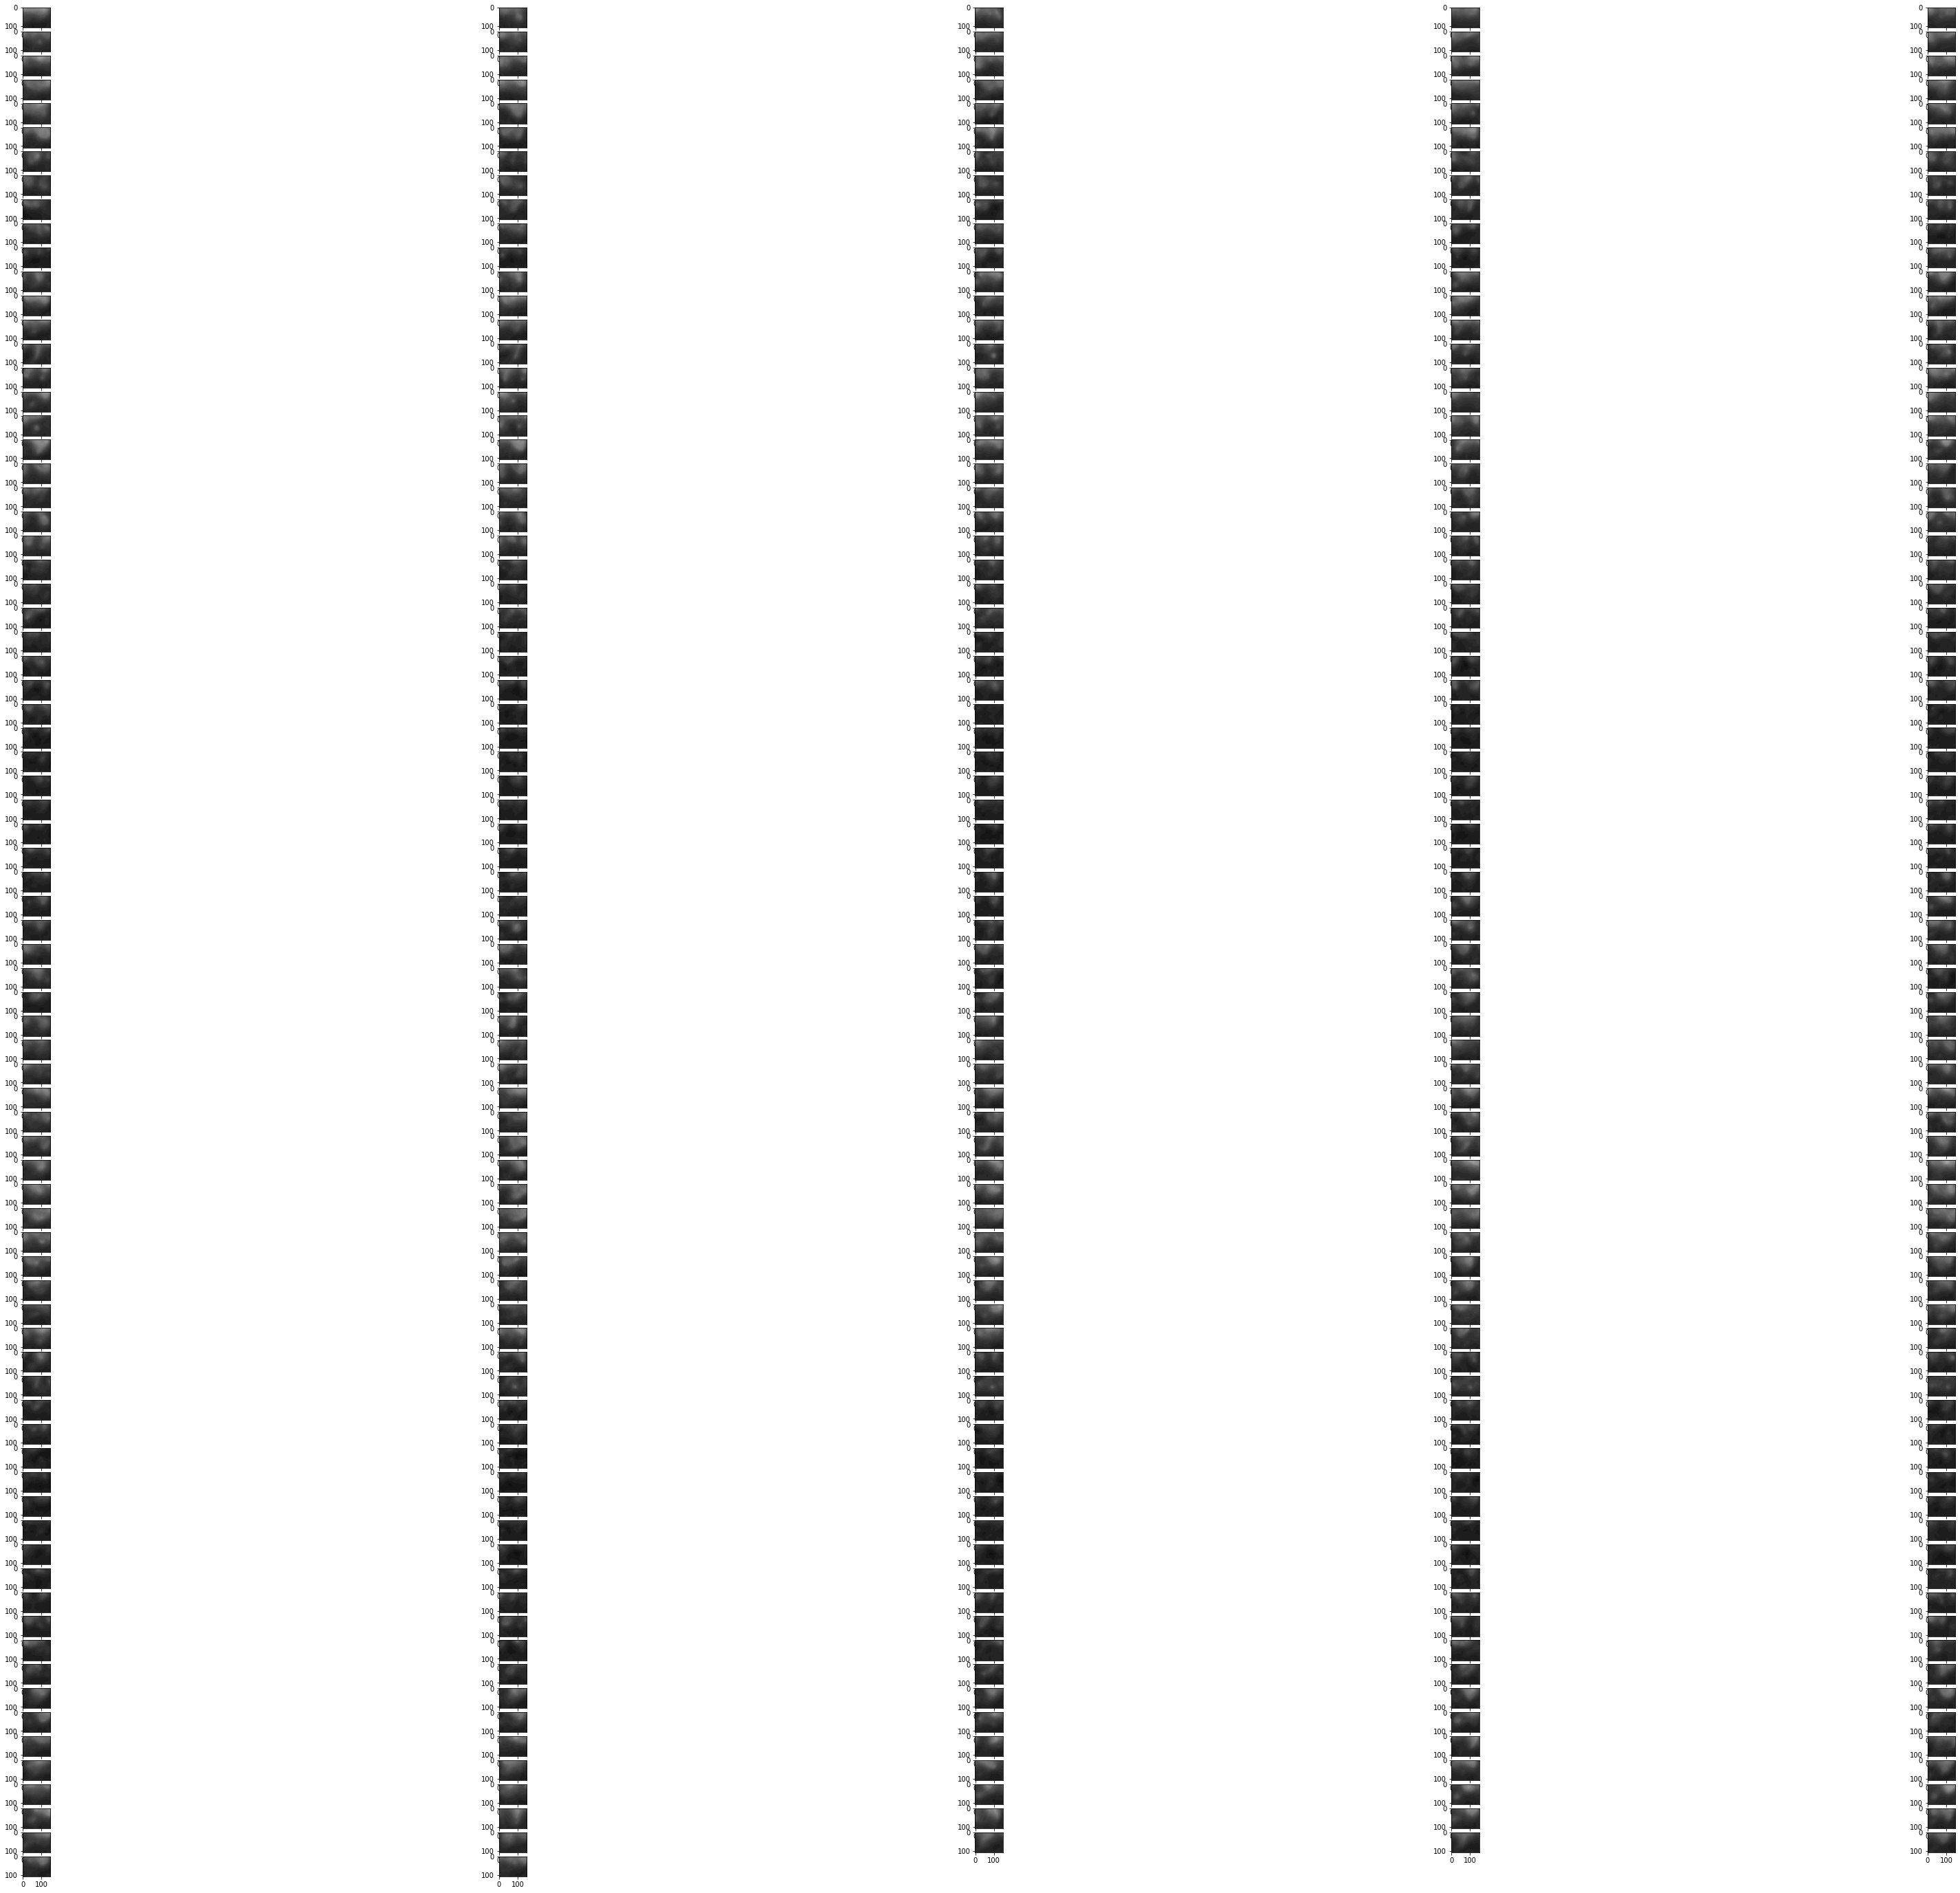

In [14]:
import glob

images = []
for img_path in glob.glob('C:/Users/Chris Battisto/Desktop/Python projects/PracPerfect/training/0/*.png'):
    images.append(mpimg.imread(img_path))
plt.figure(figsize=(60,50))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

Fitting

In [5]:
#Fit the data to the model
#Steps per epoch holds num of training images
#epochs is num of steps in training the network

hist = model.fit_generator(training_set,
steps_per_epoch = 23,
epochs = 100,
validation_data = test_set,
validation_steps = 6, callbacks=[tensorboard])


Epoch 1/100
23/23 [==============================] - 5s 215ms/step - loss: 0.6911 - accuracy: 0.5358 - val_loss: 0.6791 - val_accuracy: 0.5864
Epoch 2/100
23/23 [==============================] - 4s 181ms/step - loss: 0.6905 - accuracy: 0.5289 - val_loss: 0.6793 - val_accuracy: 0.5864
Epoch 3/100
23/23 [==============================] - 4s 188ms/step - loss: 0.6890 - accuracy: 0.5262 - val_loss: 0.6721 - val_accuracy: 0.5864
Epoch 4/100
23/23 [==============================] - 4s 184ms/step - loss: 0.6885 - accuracy: 0.5517 - val_loss: 0.6681 - val_accuracy: 0.7025
Epoch 5/100
23/23 [==============================] - 4s 188ms/step - loss: 0.6873 - accuracy: 0.5592 - val_loss: 0.6655 - val_accuracy: 0.7082
Epoch 6/100
23/23 [==============================] - 4s 182ms/step - loss: 0.6836 - accuracy: 0.5888 - val_loss: 0.6607 - val_accuracy: 0.6997
Epoch 7/100
23/23 [==============================] - 4s 184ms/step - loss: 0.6803 - accuracy: 0.5992 - val_loss: 0.6553 - val_accuracy: 0.6969

Epoch 58/100
23/23 [==============================] - 4s 181ms/step - loss: 0.6621 - accuracy: 0.6081 - val_loss: 0.6291 - val_accuracy: 0.6714
Epoch 59/100
23/23 [==============================] - 4s 185ms/step - loss: 0.6639 - accuracy: 0.6185 - val_loss: 0.6332 - val_accuracy: 0.6856
Epoch 60/100
23/23 [==============================] - 4s 184ms/step - loss: 0.6585 - accuracy: 0.6136 - val_loss: 0.6236 - val_accuracy: 0.6799
Epoch 61/100
23/23 [==============================] - 4s 186ms/step - loss: 0.6649 - accuracy: 0.6116 - val_loss: 0.6355 - val_accuracy: 0.6516
Epoch 62/100
23/23 [==============================] - 4s 183ms/step - loss: 0.6638 - accuracy: 0.6150 - val_loss: 0.6226 - val_accuracy: 0.6997
Epoch 63/100
23/23 [==============================] - 4s 182ms/step - loss: 0.6578 - accuracy: 0.6157 - val_loss: 0.6292 - val_accuracy: 0.6799
Epoch 64/100
23/23 [==============================] - 4s 188ms/step - loss: 0.6626 - accuracy: 0.6233 - val_loss: 0.6260 - val_accuracy:

Image to be evaluated

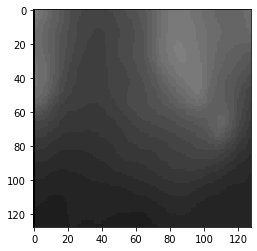

(1, 128, 128, 3)


In [6]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

img_path = 'C:/Users/Chris Battisto/Desktop/Python projects/PracPerfect/test/0/201803_13.png'
img = load_img(img_path, target_size=(128, 128))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

Evaluation mode for testing

In [7]:
#Import the image data and convert to be read by Keras
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('C:/Users/Chris Battisto/Desktop/Python projects/PracPerfect/test/0/201803_13.png', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
print(result[0][0])
if result[0][0] == 0:
    prediction='Nonsevere'
    print(prediction)
else:
    prediction = 'Severe'
    print('Severe')
    
#Save model
from keras.models import load_model
model.save('C:/Users/Chris Battisto/Desktop/Python projects/PracPerfect/CNN.h5')

Using TensorFlow backend.


0.35627285
Severe


Predict and visualize activations from predict mode

Predicted class is: [[0]]
(1, 126, 126, 64)


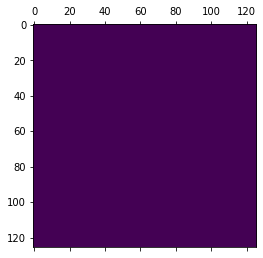

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

# predicting images.  0=Nonsevere, 1=severe
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
print("Predicted class is:",classes)

layer_outputs = [layer.output for layer in model.layers[:12]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 31], cmap='viridis')


In [ ]:
j=0
    
first_layer_activation = activations[0]
for i in range(0,32):
    j+=1
    plt.matshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.title("Convolution Layer 1 F" + str(j) + "\n")
    plt.savefig(str(j) + '.png', bbox_inches="tight")
    plt.close()
first_layer_activation = activations[1]
for i in range(0,32):
    j+=1
    plt.matshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.title("Max Pooling Layer 1 F" + str(j) + "\n")
    plt.savefig(str(j) + '.png', bbox_inches="tight")
    plt.close()
first_layer_activation = activations[2]
for i in range(0,32):
    j+=1
    plt.matshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.title("Convolution Layer 2 F" + str(j) + "\n")
    plt.savefig(str(j) + '.png', bbox_inches="tight")
    plt.close()
first_layer_activation = activations[3]
for i in range(0,32):
    j+=1
    plt.matshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.title("Max Pooling Layer 2 F" + str(j) + "\n")
    plt.savefig(str(j) + '.png', bbox_inches="tight")
    plt.close()
first_layer_activation = activations[4]
for i in range(0,32):
    j+=1
    plt.matshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.title("Convolution Layer 3 F" + str(j) + "\n")
    plt.savefig(str(j) + '.png', bbox_inches="tight")
    plt.close()
first_layer_activation = activations[5]
for i in range(0,32):
    j+=1
    plt.matshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.title("Max Pooling Layer 3 F" + str(j) + "\n")
    plt.savefig(str(j) + '.png', bbox_inches="tight")
    plt.close()
first_layer_activation = activations[6]
for i in range(0,32):
    j+=1
    plt.matshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.title("Convolution Layer 4 F" + str(j) + "\n")
    plt.savefig(str(j) + '.png', bbox_inches="tight")
    plt.close()
first_layer_activation = activations[7]
for i in range(0,32):
    j+=1
    plt.matshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.title("Max Pooling Layer 4 F" + str(j) + "\n")
    plt.savefig(str(j) + '.png', bbox_inches="tight")
    plt.close()

Visualize every channel

D:\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


MemoryError: Unable to allocate array with shape (456976, 43264) and data type float64

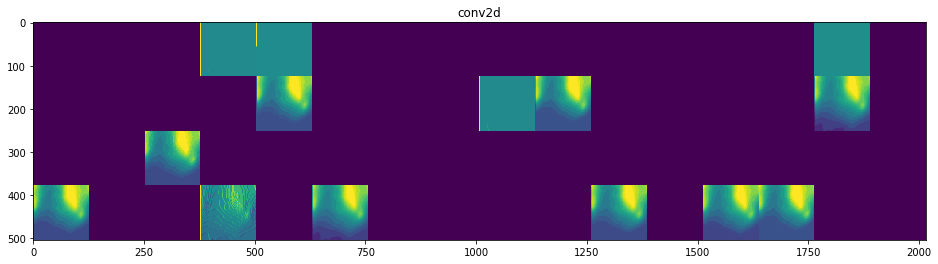

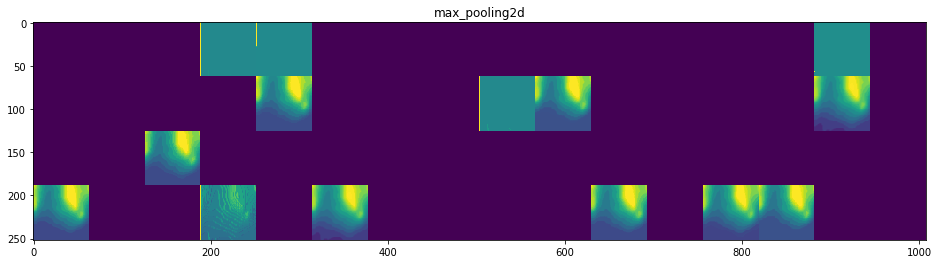

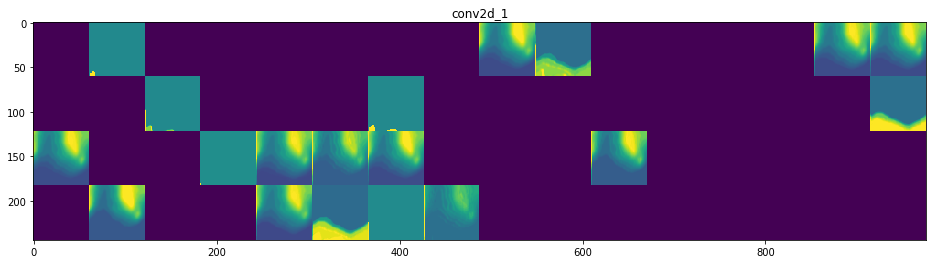

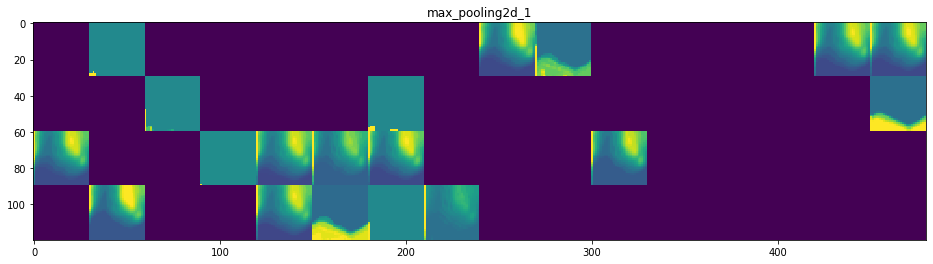

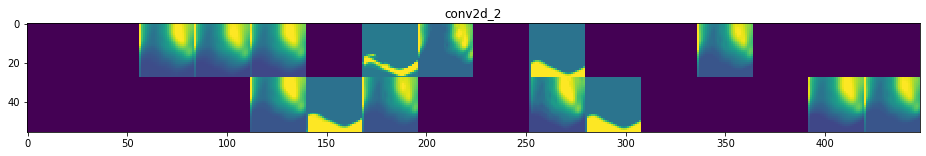

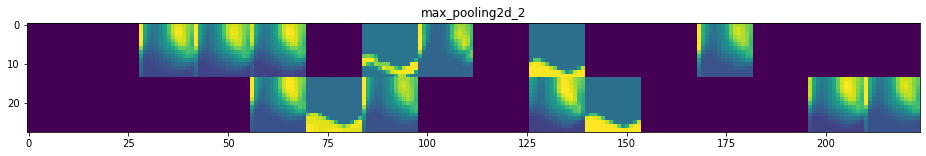

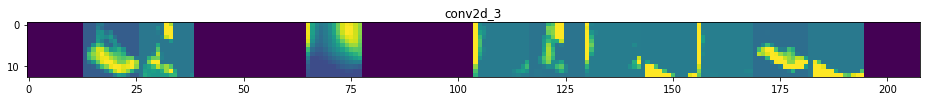

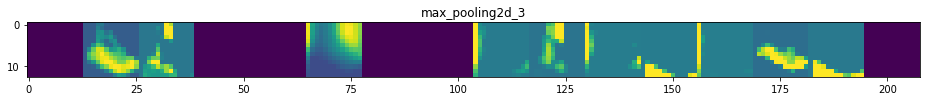

In [9]:
layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Epoch accuracy/history graphs

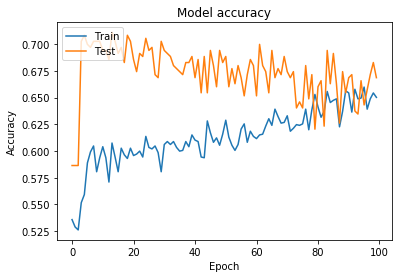

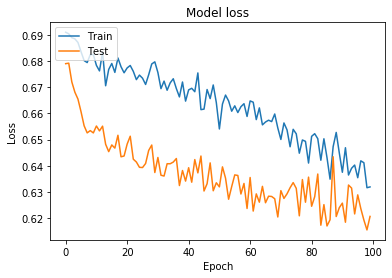

InvocationException: GraphViz's executables not found

In [10]:
# Plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model

plot_model(model, to_file='test_keras_plot_model.png', show_shapes=True)

#print(model.layers.get_config())